# Inisiasi Data

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [ ]:
from sklearn import datasets

# Muat dataset Iris
iris = datasets.load_iris()
X = iris.data

data = pd.DataFrame(X, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])


In [ ]:
# Mengunduh dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

# Membaca dataset ke dalam DataFrame
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('iris.data', header=None, names=column_names)

# Menampilkan lima baris pertama dari dataset
print(df.head())


--2023-09-28 08:52:58--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘iris.data.15’

iris.data.15            [ <=>                ]   4.44K  --.-KB/s    in 0s      

2023-09-28 08:52:59 (74.2 MB/s) - ‘iris.data.15’ saved [4551]

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


### Informasi data

Data yang digunakan merupakan data dari tanaman iris dengan variabel ukur yaitu Petal Length, Petal Width, Sepal Length, dan Sepal Width.


# A. Pengelompokkan Pada Data 2D

### a. Petal Length vs Petal Width

###### Pendekatan K-Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


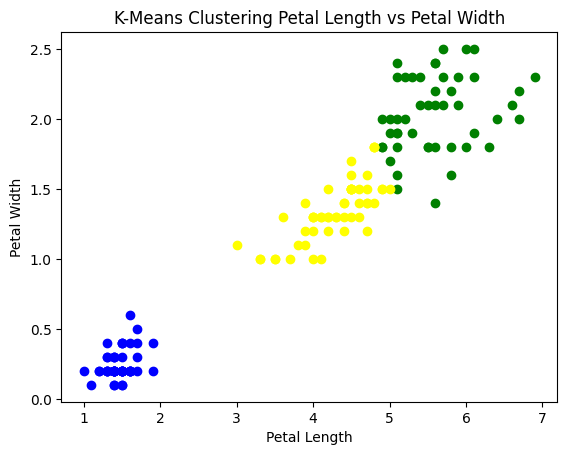

In [ ]:
X = data[['petal_length', 'petal_width']]

# Training k-means model
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# Predictions from k-means
pred = kmeans.predict(X)
data['cluster'] = pred

# Plotting results
colors = ['blue', 'green', 'yellow']
for k in range(3):
    cluster_data = data[data['cluster'] == k]
    plt.scatter(cluster_data['petal_length'], cluster_data['petal_width'], c=colors[k], label=f'Cluster {k}')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('K-Means Clustering Petal Length vs Petal Width')
plt.show()


##### Pendekatan GMM

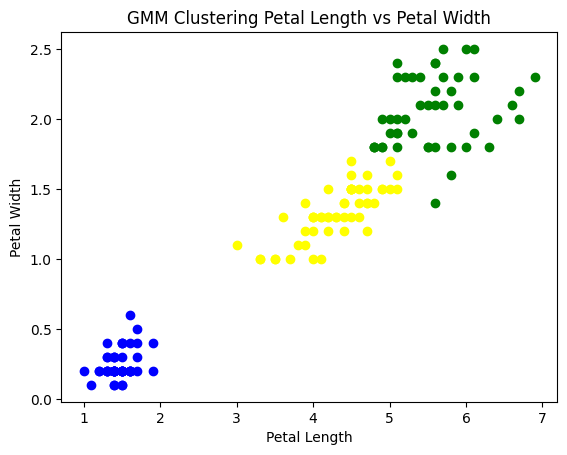

In [ ]:
X = data[['petal_length', 'petal_width']]

# Training Gaussian Mixture Model
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(X)

# Prediction from GMM
labels = gmm.predict(X)
data['cluster'] = labels

# Plotting results
colors = ['blue', 'green', 'yellow']
for k in range(3):
    cluster_data = data[data['cluster'] == k]
    plt.scatter(cluster_data['petal_length'], cluster_data['petal_width'], c=colors[k], label=f'Cluster {k}')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('GMM Clustering Petal Length vs Petal Width')
plt.show()


##### Pendekatan GMM menggunakan EM

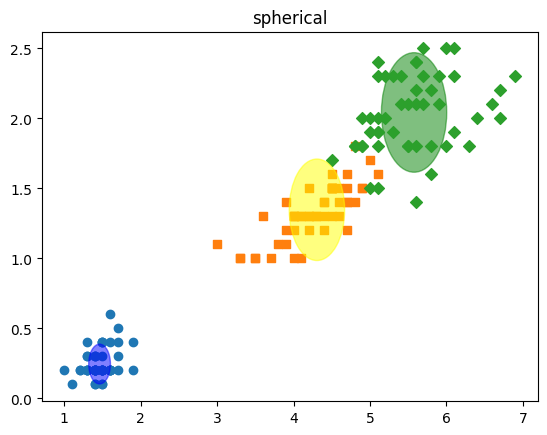

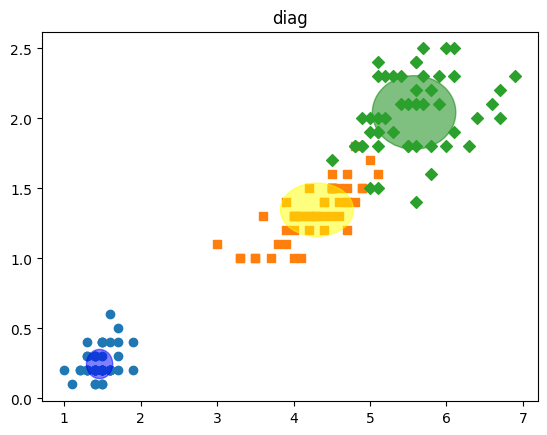

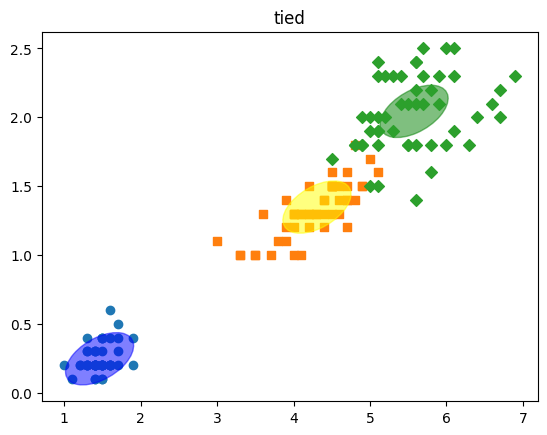

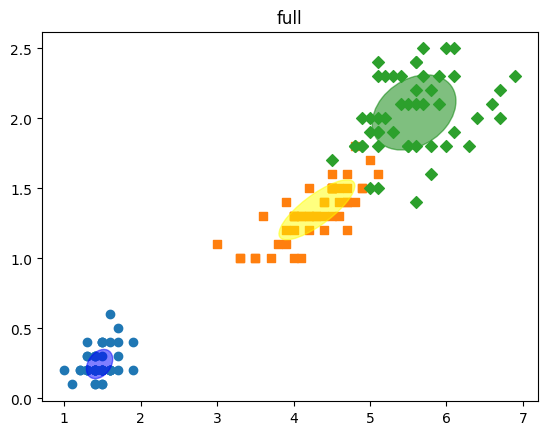

In [ ]:
estimators = dict((cov_type, GaussianMixture(n_components=3,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])
for (name,estimator) in estimators.items():
    estimator.fit(iris.data[:,2:4]) # fits mixture model menggunakan EM

for (name,gmm) in estimators.items():
    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 2], data[:, 3], marker=markers[n])
        if gmm.covariance_type == 'full':
            cov = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            cov = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            cov = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            cov = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        #print(cov)
        pos = estimator.means_[n]
        #print(pos)
        plot_cov_ellipse(cov,pos,col=color)
    plt.title(name)
    plt.show()

### b. Sepal Length vs Sepal Width

In [ ]:
from sklearn import datasets

# Muat dataset Iris
iris = datasets.load_iris()
Y = iris.data

data = pd.DataFrame(Y, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])


###### Pendekatan K-Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


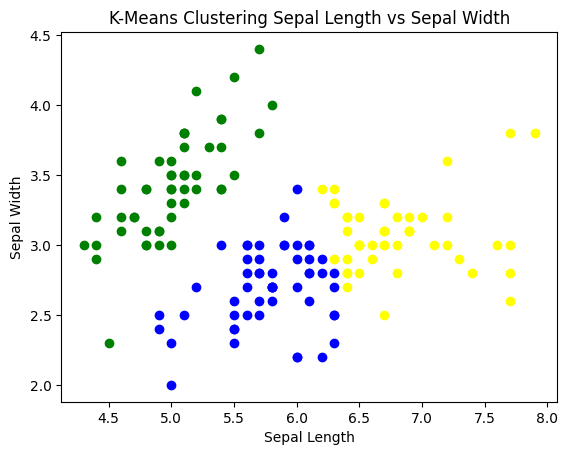

In [ ]:
Y = data[['sepal_length', 'sepal_width']]

# Training k-means model
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(Y)

# Predictions from k-means
pred = kmeans.predict(Y)
data['cluster'] = pred

# Plotting results
colors = ['blue', 'green', 'yellow']
for k in range(3):
    cluster_data = data[data['cluster'] == k]
    plt.scatter(cluster_data.values[:, 0], cluster_data.values[:, 1], c=colors[k], label=f'Cluster {k}')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-Means Clustering Sepal Length vs Sepal Width')
plt.show()


##### Pendekatan GMM

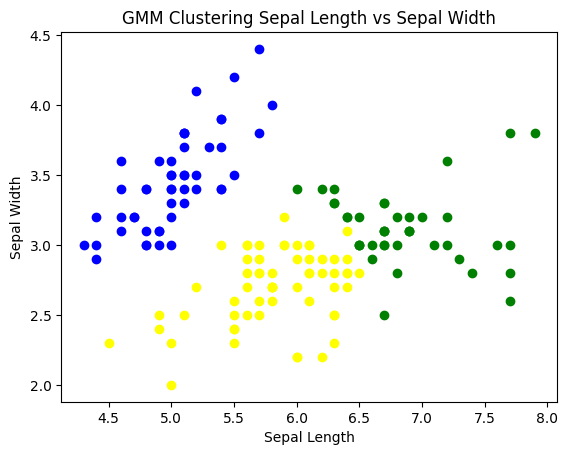

In [ ]:
Y = data[['sepal_length', 'sepal_width']]

# Training Gaussian Mixture Model
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(Y)

# Prediction from GMM
labels = gmm.predict(Y)
data['cluster'] = labels

# Plotting results
colors = ['blue', 'green', 'yellow']
for k in range(3):
    cluster_data = data[data['cluster'] == k]
    plt.scatter(cluster_data['sepal_length'], cluster_data['sepal_width'], c=colors[k], label=f'Cluster {k}')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('GMM Clustering Sepal Length vs Sepal Width')
plt.show()


##### Pendekatan GMM menggunakan EM

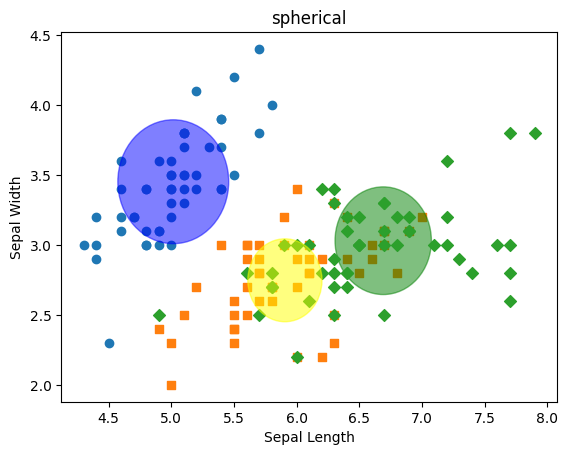

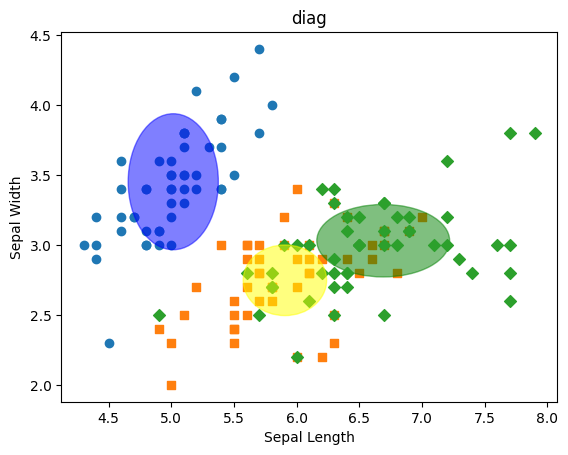

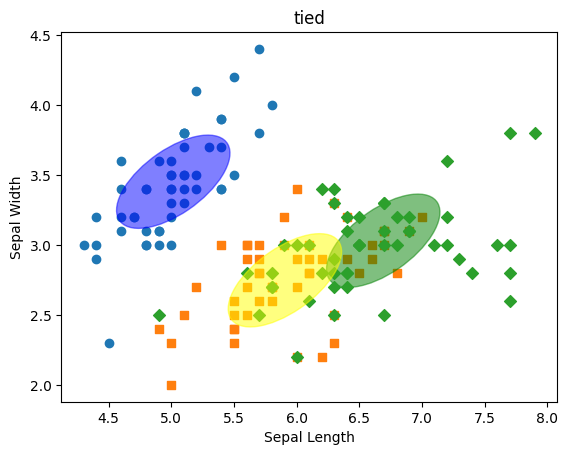

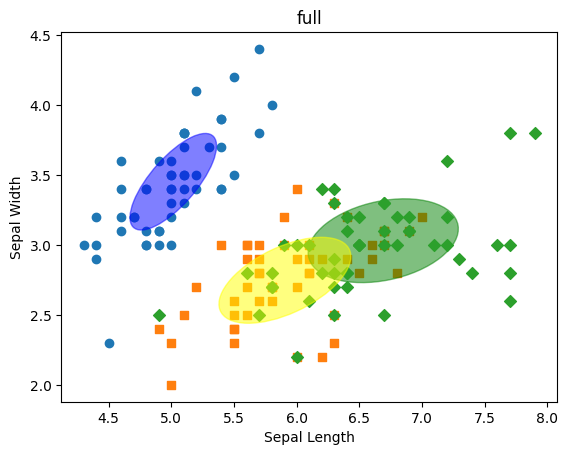

In [ ]:
estimators = dict((cov_type, GaussianMixture(n_components=3,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])

for (name,estimator) in estimators.items():
    estimator.fit(iris.data[:,:2])  # Menggunakan sepal_length dan sepal_width

for (name,gmm) in estimators.items():
    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], marker=markers[n])  # Menggunakan sepal_length dan sepal_width

        if gmm.covariance_type == 'full':
            cov = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            cov = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            cov = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            cov = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]

        pos = estimator.means_[n]
        plot_cov_ellipse(cov,pos,col=color)

    plt.title(name)
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.show()


# B. Analisis Data
##### Akan dilakukan prediksi cluster untuk setiap titik data untuk pendekatan K-Means Clustering dan GMM pada ke dua data 2D di atas. Selanjutnya, akan dilakukan analisa hasil perbandingan dari K-Means Clustering dan GMM Clustering.

Menghitung silhouette avg merupakan metode untuk menemukan jumlah klaster yang optimal dalam clustering data dengan menghitung koefisien siluet dari setiap titik yang mengukur seberapa mirip suatu titik dengan clusternya sendiri dibandingkan dengan cluster lain.

In [ ]:
from sklearn.metrics import silhouette_score

# pred adalah label kluster dari K-Means
silhouette_avg = silhouette_score(X, pred)
print("Silhouette Score Petal (K-means):", silhouette_avg)
silhouette_avg = silhouette_score(Y, pred)
print("Silhouette Score Sepal (K-means):", silhouette_avg)

# labels adalah label kluster dari GMM
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score Petal GMM:", silhouette_avg)
silhouette_avg = silhouette_score(Y, labels)
print("Silhouette Score Sepal GMM:", silhouette_avg)

Silhouette Score Petal (K-means): 0.5085037699826875
Silhouette Score Sepal (K-means): 0.4450525692083638
Silhouette Score Petal GMM: 0.4576770181031181
Silhouette Score Sepal GMM: 0.43420959833525274


Dilihat dari perbandingan Silhouetter Score **Petal** menurut **K-Means** (0.50648) dan **GMM** (0.47026) dimana penggunaan **K-Means** lebih tinggi nilainya sehingga dianggap Clustering menggunakan K-Means lebih baik. Untuk Silhouetter Score **Sepal** menurut **K-Means** (0.44505) dan **GMM** (0.43420) dimana penggunaan **K-Means** lebih tinggi nilainya sehingga dianggap Clustering menggunakan K-Means lebih baik.

 Apabila dilihat dari plot cluster pada Pengelompokkan data 2D, dibuat dalam 3 kelompok (cluster). Perbedaan dari plot cluster K-Means, GMM, dan GMM-EM adalah sebagai berikut:

 **K-Means**


*   Titik data yang berdekatan dengan pusat cluster dianggap menjadi cluster yang sama
*   Pusat cluster adalah representasi rata-rata cluster

**GMM**

*   Titik data yang berdekatan dengan pusat komponen Gaussian dengan probabilitas anggota tertinggi
*    Pusat-pusat komponen Gaussian mungkin tidak selalu sesuai dengan titik data aktual dalam datase karena merupakan representasi dari distribusi Gaussian.

**GMM-EM**

*   Mirip dengan GMM-EM namun proses iterasi EM berlanjut hingga konvergensi, di mana pusat komponen Gaussian dan probabilitas anggotaan data telah stabil.